* Name : Joonyoung-Choi
* Student ID: 20112096
* Description: implement k-means algorithm, explain and show the result
* github: https://github.com/mydream757/Computer_Vision

1. Import liabraries and define class

* import needed libraries.

In [1]:
import math
from random import *
import matplotlib
import matplotlib.pyplot as plt

* define class to construct points$(x,y)$

In [2]:
class point:
    x = 0
    y = 0
    label = -1   #initial value is -1, 0 to k-1 is valid
    dist = []
    def initDist(self,k):
        self.dist = [0 for i in range(k)]
    def assignLabel(self):
        self.label = self.dist.index(min(self.dist))
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def printAll(self):
        print(self.x, self.y, self.label)
        print(self.dist)

2. Define methods

* generate initial centroids randomly

In [3]:
def generatePointCluster(min,max,k):
    #set seed for random
    #containers of clusters
    points = []
    #generate labels as many as numberOfClusters
    for i in range(k):
        seed()
        #The range of coordinates is preset: x[0:100] y[0:100]
        p = point(randrange(min,max,1),randrange(min,max,1))
        points.append(p)
    return points

* I use input data(=points) from data.txt file.
* generate input data and save to data.txt file.

In [4]:
def writeRandomPoints(min,max,numberOfPoints,filename):
    f = open(filename,'w')
    x = []
    y = []
    for i in range(numberOfPoints):
        seed()
        tx = str(randrange(min,max,1))
        ty = str(randrange(min,max,1))
        txt = tx+" "+ty+"\n"
        f.writelines(txt)
    f.close()

* this reads data from data.txt. so, I don't need to generate data on each execution.

In [5]:
def readFromText(filename):
    f = open(filename,'r')
    points = []
    while True:
        line = f.readline()
        if not line: break
        x, y = line.split()
        p = point(int(x),int(y))
        points.append(p)

    f.close()
    return points

* compute distance between two points. $\qquad d = \sqrt{(x_a-x_b)^2 + (y_a-y_b)^2}$

In [6]:
def computeDistance(pA, pB):
    pow = math.pow((pA.x - pB.x),2) + math.pow((pA.y - pB.y),2)
    distance = math.sqrt(pow)
    return distance

* compute energy at $i$-iteration. $V = \frac{1}{N}\sum_{k=1}^{K} \sum_{n=1}^{N}r_{nk}\Vert{X_n}-{c_k}\Vert^2$

In [7]:
def computeEnergy(points, clusters):
    sum = 0
    for k in range(len(clusters)):
        for i in range(len(points)):
            if points[i].label == k:
                sum = sum + math.pow(computeDistance(points[i],clusters[k]),2)
    return sum/len(points)

* compute centroid $c_k$.

In [8]:
def computeCentroid(points, clusters):
    centroids = []
    for k in range(len(clusters)):
        count = 0
        sumX = 0
        sumY = 0
        for i in range(len(points)):
            if points[i].label == k:
                sumX = sumX + points[i].x
                sumY = sumY + points[i].y
                count = count + 1
        if count != 0:
            centroid = point(sumX/count, sumY/count)
        else:
            centroid = clusters[k]
        centroids.append(centroid)
    return centroids


* loop condition is "label change of points".
* if no change, loop stops.

In [9]:
def checkChangeLabel(previous,current):
        for i in range(len(previous)):
            if previous[i]!=current[i]:
                return True
        return False

* make the list of labels. the index of the list is same with the index of the points list. 

In [10]:
def makeLabelList(points):
    Labels = []
    for i in range(len(points)):
        Labels.append(points[i].label)
    return Labels

* using the computed distances, tagging label on the points

In [11]:
def initializeLabel(points,clusters):
    for i in range(len(points)):
        points[i].initDist(len(clusters))
        for k in range(len(clusters)):
            points[i].dist[k] = computeDistance(clusters[k],points[i])
        points[i].assignLabel()      #tag labels to points

* list is of $(x,y)$
* seperate it to $x$ list and $y$ list to draw plot.

In [12]:
def separatePointsToXY(points,indexOfCluster):
    x = []
    y = []
    for i in range(len(points)):
        if points[i].label == indexOfCluster:
            x.append(points[i].x)
            y.append(points[i].y)
    return [x,y]

3. Execution and get result 

* execute func. writeRandomPoints(*,*,*,*) if there is no input data.

In [13]:
#writeRandomPoints(0,1500,100,"data.txt")       #generate data set and save as .txt

* read data(=points) from text file and generate initial centroids

In [14]:
######  initial setting  ######
points = readFromText("data.txt")           #initialize data from .txt file
Px,Py = separatePointsToXY(points,-1)
centroids = generatePointCluster(0,1500,8)     #generate initial centroids randomly
Cx,Cy = separatePointsToXY(centroids,-1)

* figure the initial set. scattered data and centroids

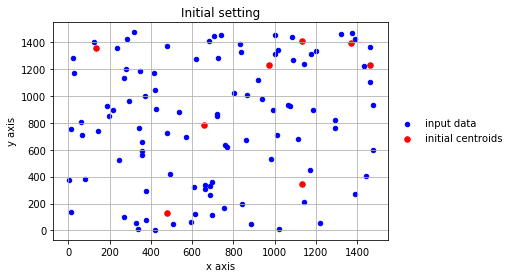

In [15]:
fig = plt.figure()
plt.scatter(Px,Py,color='b',marker='o',s=20,label='input data')
plt.scatter(Cx,Cy,color='r',marker='o',s=30,label='initial centroids')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Initial setting')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),frameon=False)
plt.grid(True)
plt.show()

* save label list before initializing label
* initialize label
* save label list after the lnitialization
* the two list are used to check loop condition

In [16]:
previous = makeLabelList(points)         #save initial label list
initializeLabel(points,centroids)        #initialize Label
current = makeLabelList(points)         #after assign label, make label list

* loop the steps. 

    * compute centroids. 
    * tag labels to points.
    * condition check. if there is no change, loop stops

* graph the result of iteration.

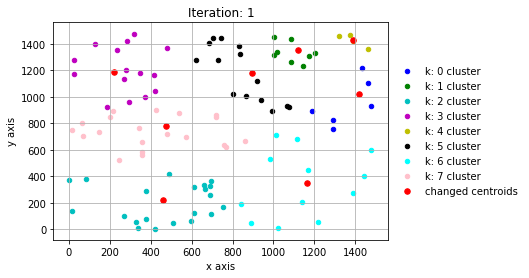

Energy of iteration 1 63013.808214 



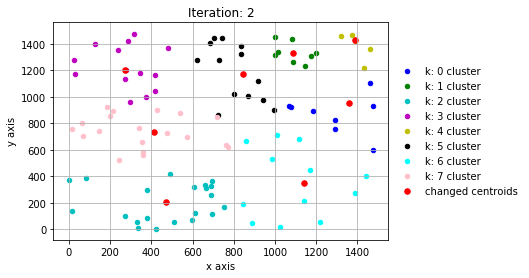

Energy of iteration 2 58725.672532 



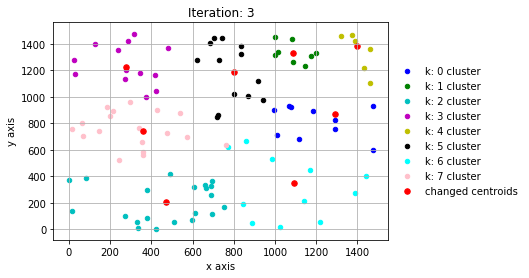

Energy of iteration 3 54997.849642 



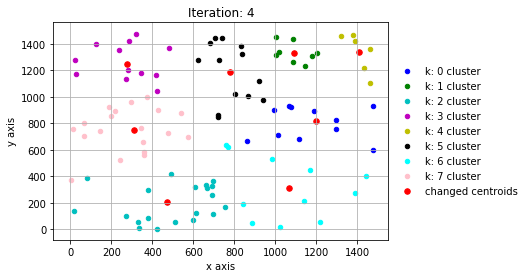

Energy of iteration 4 52291.431388 



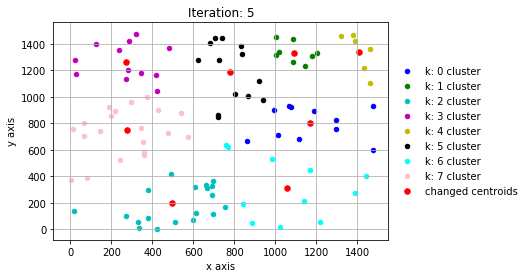

Energy of iteration 5 51410.284238 



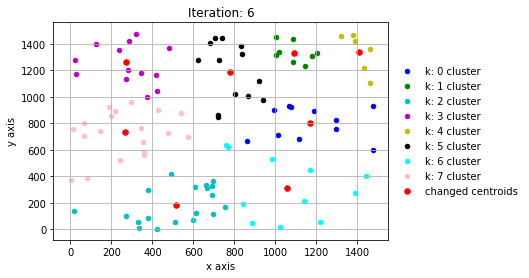

Energy of iteration 6 51192.842029 



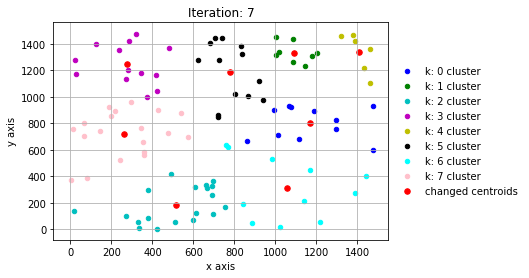

Energy of iteration 7 51086.954682 



In [17]:
######  loop clustering  ######
count = 0
while checkChangeLabel(previous,current):  #no change, loop stops
    count = count + 1
    previous = current                     #save the labels list
    nextCentroids = computeCentroid(points, centroids) #get new centroids
    initializeLabel(points, nextCentroids)   #tag labels
    current = makeLabelList(points)        #get labels list
    centroids = nextCentroids                
    energy = computeEnergy(points, nextCentroids)  #compute energy 
    xList = []
    yList = []
    fig = plt.figure()
    for i in range(len(centroids)):
        x,y = separatePointsToXY(points,i)
        xList.append(x)
        yList.append(y)
        color = ['b','g','c','m','y','k','aqua','pink','purple']
        label = "k: "+str(i)+" cluster"
        plt.scatter(xList[i],yList[i],color=color[i],marker='o',s=20,label=label)
    Cx,Cy = separatePointsToXY(centroids,-1)
    plt.scatter(Cx,Cy,color='r',marker='o',s=30,label='changed centroids')
    title = "Iteration: " + str(count)
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),frameon=False)
    plt.grid(True)
    plt.show()
    print("Energy of iteration %d"%count,"%f"%energy,"\n")
